In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit

%matplotlib inline

In [24]:
# Read the CSV file into a DataFrame
data = pd.read_csv("AAPL.csv", index_col = "Date")

data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-30,21.165714,21.408215,21.064285,21.074642,18.562872,456640800
2014-05-01,21.142857,21.242857,20.941429,21.124287,18.606590,244048000
2014-05-02,21.155001,21.221430,21.061071,21.163570,18.641197,191514400
2014-05-05,21.076429,21.464287,21.071428,21.462856,18.904810,287067200
2014-05-06,21.492857,21.586071,21.228930,21.228930,18.698767,374564400


In [25]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=["High"])
y = data["High"]


In [26]:
# Optionally, perform feature scaling if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])


/Users/kd17/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [30]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9881.6621 - mse: 9881.6621 - val_loss: 9906.0312 - val_mse: 9906.0312
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 8257.9033 - mse: 8257.9033 - val_loss: 5565.7446 - val_mse: 5565.7446
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3919.8970 - mse: 3919.8970 - val_loss: 894.0210 - val_mse: 894.0210
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 740.7511 - mse: 740.7511 - val_loss: 477.6228 - val_mse: 477.6228
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 503.1577 - mse: 503.1577 - val_loss: 404.7176 - val_mse: 404.7176
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 406.2929 - mse: 406.2929 - val_loss: 334.6714 - val_mse: 334.6714
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 316.5577 - mse: 316.5577 - val_loss: 257.8227 - val_mse: 257.8227
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 279.6501 - mse: 279.6501 - val_loss: 199.7388 

In [31]:
loss, mse = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", mse)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3603 - mse: 0.3603
Mean Squared Error (MSE): 0.42864614725112915


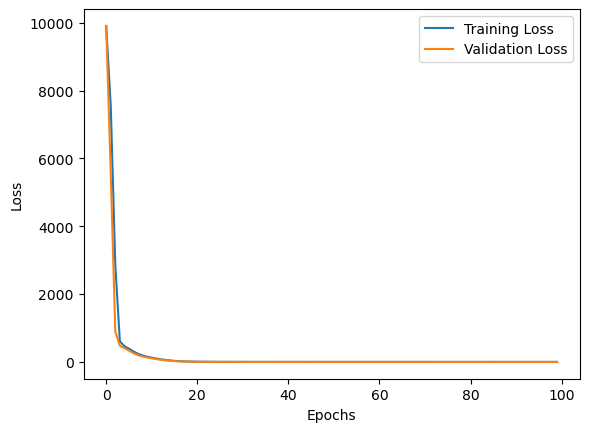

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
predictions = model.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
